## PyBEAM Tutorial 2: Using your model.

In this tutorial, we discuss how to use the model structure discussed in Tutorial 1. If you have not done so already, go to the Tutorial 1 notebook to learn about how to build a model.

Once you have done this, import PyBEAM's default sub-module.


In [28]:
# import PyBEAM's default module
import pybeam.default as pbd


We first create the 'base' model discussed in Tutorial 1 with no additional features.


In [29]:
# define base model
model = {'type' : 'base',  # model type ('base' or 'ugm')
        'sigma' : 1.0,     # sets sigma, the scaling parameter
    'threshold' : 'fixed', # sets threshold type (fixed, linear, exponential, or weibull)
      'leakage' : False,   # if True, drift rate has leaky integration
        'delay' : False,   # if True, decision threshold motion is delayed
'contamination' : False}   # if True, uniform contamination added to model


After specifying the model, it is helpful to run PyBEAM's parse_model function. It accepts your model dictionary as an input, and outputs the parameters corresponding to that model. This does two things. First, it checks if you have defined the model you want. Secondly, if you are unsure what parameters a model calls for, it tells you what parameters need to be input into future functions.


In [30]:
# outputs which parameters your model uses
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'a']

Now that we have defined our model and checked that is uses the parameters we desire, we now introduce functions PyBEAM implements that you can use to test your model.

The first is simulate_data, a function which simulates data from your model. This requires at least three inputs: N_sims, model, and phi. The first, N_sims, sets how many data points are generated. The second, model, requires the model dictionary defined above.

The last, phi, is a dictionary containing the parameters (as keys) and their values (as the key's values). Per the parse_model function, this dictionary requires four keys: 't_nd', 'w', 'mu', and 'a'. The values corresponding to these keys are the parameter's values.

Two optional inputs are also available for this funtion. The first, seed, allows you to set a random generator seed so that you can reproduce your data set. The second, dt, allows for modification of the simulation function's time step (by default, dt = 0.0001).

This functions outputs a dictionary containing two keys: 'rt_upper' and 'rt_lower'. These correspond to the simulated reaction time data sets for the upper and lower decision thresholds, respectively.


In [31]:
# parameters for model
phi = {'t_nd' : 0.25, # non-decision time
          'w' : 0.5,  # relative start point
         'mu' : 1.0,  # drift rate
          'a' : 0.5}  # decision threshold location

# simulate data from the model
rt = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                         model = model, # dictionary containing model information
                           phi = phi)   # parameters used to simulate data

rt


{'rt_upper': array([0.4565, 0.5589, 0.8451, 0.3698, 0.324 , 0.5409, 0.3581, 0.5301,
        0.7582, 0.4806, 0.3506, 0.4323, 0.3449, 0.3875, 0.3708, 0.3561,
        0.4529, 0.4175, 0.6234, 0.3382, 0.3833, 0.3682, 0.2789, 0.4652,
        0.4695, 0.3745, 0.3829, 0.7591, 0.3925, 0.3316, 0.6257, 0.6305,
        1.0171, 0.4808, 0.4519, 0.2787, 0.3545, 0.33  , 0.7734, 0.3842,
        0.3154, 0.3893, 0.5692, 0.4409, 0.4142, 0.9649, 0.3664, 0.419 ,
        0.448 , 0.7262, 0.7054, 0.5189, 0.7133, 0.4539, 0.314 , 0.5128,
        0.3871, 0.4907, 0.4124, 0.4317, 0.9852, 0.7838, 0.431 , 0.5776,
        0.9623, 0.3219, 0.8584, 0.8439, 0.6001, 0.4506, 0.6445, 0.4542,
        0.3211, 0.4849, 0.5563, 0.3743, 0.4306, 0.7121, 0.5382, 0.4921,
        0.3434, 0.605 , 0.8359, 0.8216, 0.7748, 0.3248, 0.6053, 0.3625,
        0.3884, 0.3902, 0.3737, 0.3405, 0.394 , 0.3616, 0.3173, 0.5603,
        0.5215, 0.2834, 0.3632, 0.6878, 0.4161, 0.394 , 0.3462, 0.5067,
        0.4139, 0.3387, 0.4081, 0.3842, 0.8748, 0.55

The next function we introduce is model_rt. model_rt allows takes the input model and calculates its likelihood function (i.e. the model's predicted rt distribution). It has two required inputs: model and phi. These are the same inputs as those used by the simulate_model function. 

It also has two optional inputs, x_res and t_res, which allow modification of the spatial and time stepping resolution. In general, these need not be touched (see default functions description file for more info).

This function outputs a dictionary containing three keys: 'time', 'model_rt_upper', and 'model_rt_lower'. These contain the time, upper threshold likelihood function, and lower threshold likelihood function, respectively.


In [32]:
mrt = pbd.model_rt(model = model,
                     phi = phi)

mrt


{'time': array([0.25005563, 0.25011125, 0.25016688, 0.2502225 , 0.25027813,
        0.25033375, 0.25038938, 0.250445  , 0.25050062, 0.25055625,
        0.25061187, 0.2506675 , 0.25072312, 0.25077875, 0.25083437,
        0.25089   , 0.25094563, 0.25100125, 0.25105688, 0.2511125 ,
        0.25116813, 0.25122375, 0.25127938, 0.251335  , 0.25139062,
        0.25150132, 0.25166708, 0.25188791, 0.25216381, 0.25249478,
        0.25288082, 0.25332193, 0.2538181 , 0.25436934, 0.25497566,
        0.25563704, 0.25635349, 0.25712501, 0.25795159, 0.25883325,
        0.25976997, 0.26076177, 0.26180863, 0.26291056, 0.26406756,
        0.26527963, 0.26654677, 0.26786898, 0.26924625, 0.27067859,
        0.27216601, 0.27370849, 0.27530604, 0.27695866, 0.27866634,
        0.2804291 , 0.28224692, 0.28411982, 0.28604778, 0.28803081,
        0.29006891, 0.29216208, 0.29431032, 0.29651363, 0.298772  ,
        0.30108544, 0.30345396, 0.30587754, 0.30835619, 0.31088991,
        0.31347869, 0.31612255, 0.318821

The next function we introduce is model_loglike. model_loglike allows takes the input model and and a dataset and calculates the loglikelihood of the data (based on the model's likelihood function). It has three required inputs: model, phi, and rt. model and phi are the same inputs as those used by the simulate_model and model_rt functions.

The input rt requires a dictionary containing the reaction time data you want to find the loglikelihood of. The dictionary must look the same as that output by simulate_model. It should have two keys, 'rt_upper' and 'rt_lower', whose values are lists/numpy arrays which the rt data for the upper and lower decision thresholds, respectively.

It also has two optional inputs, x_res and t_res, which allow modification of the spatial and time stepping resolution. In general, these need not be touched (see default functions description file for more info).

This function outputs a number corresponding to the data's loglikelihood.


In [33]:
ll = pbd.model_loglike(model = model,
                         phi = phi,
                          rt = rt)

ll


-13.87126516670557

PyBEAM also contains a plotting utility. It generates a figure which overlays the model likelihood over rt data. It accepts the same model and phi inputs as the simulate_model function, but also requires an input of the rt. This is the same input as for the model_loglike function. Input rt must be a dictionary containing two keys, 'rt_upper' and 'rt_lower'. The values for these keys are lists/numpy arrays which contain the rt data for the upper and lower decision thresholds, respectively.

The function has two three additional optional inputs: x_res, t_res, and bins. x_res and t_res are discussed further in the functions description notebook, but you should never need to change their default settings. bins sets the amount of histogram bins to use for the rt data. Though the default setting often is fine, it sometimes fails to choose the proper bin amount and may need to be manually input.


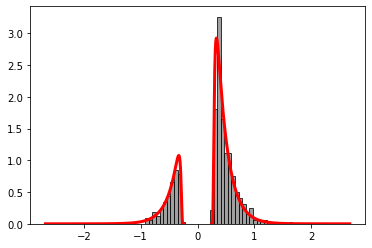

In [34]:
# plot data and model likelihood function
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi,   # parameters used for model rt distribution
               rt = rt);   # dictionary of simulated rt data
